# Perturbed polynomials

In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.dpi'] = 125

### Visualizations of root values

Analyzing perturbed coefficients and roots of
$$p(x) = (x-1)(x-2)(x-3)(x-4)(x-5)(x-6)(x-7)(x-8)(x-9)(x-10)$$
Expanding, we have
$$p(x) = x^{10} - 55 x^9 + 1320 x^8 - 18150 x^7 + 157773 x^6 - 902055 x^5 + 3416930 x^4 - 8409500 x^3 + 12753576 x^2 - 10628640 x + 3628800$$
The roots are:

In [3]:
coeff = [1, -55, 1320, -18150, 157773, -902055, 3416930, -8409500, 12753576, -10628640, 3628800]
roots = np.roots(coeff)
print(roots)

[10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]


In [4]:
#a_exp = list(range(-10, 1, 0.5)) # consecutive numbers
a_exp = list(np.arange(-10, 1, 0.5)) # consecutive numbers
a_vals = [0] + list(map(lambda x:pow(10, x), a_exp))
print(a_vals)

[0, 1e-10, 3.1622776601683795e-10, 1e-09, 3.1622776601683795e-09, 1e-08, 3.162277660168379e-08, 1e-07, 3.162277660168379e-07, 1e-06, 3.162277660168379e-06, 1e-05, 3.1622776601683795e-05, 0.0001, 0.00031622776601683794, 0.001, 0.0031622776601683794, 0.01, 0.03162277660168379, 0.1, 0.31622776601683794, 1.0, 3.1622776601683795]


Perturbing coefficients

In [5]:
coeff_ck = coeff[1:]
print(coeff_ck)

[-55, 1320, -18150, 157773, -902055, 3416930, -8409500, 12753576, -10628640, 3628800]


In [6]:
def perturb_coeff(a, coeff):
    coeff_perturbed = []
    for c_k in coeff:
        e_k = np.random.normal(0, 1) # mu = 0, sigma = 1
        coeff_perturbed.append(c_k*(1 + a*e_k))
    return coeff_perturbed

def dist(coeff_ck, new_coeff_ck):
    return [i - j for i, j in zip(new_coeff_ck, coeff_ck)]

def roots_perturb_coeff(perturb_coeff):
    perturb_coeff_full = [1] + perturb_coeff
    return np.roots(perturb_coeff_full)

def real_roots(roots):
    return list(roots.real[abs(roots.imag)<1e-5])

In [7]:
# testing

example_a = 10
example_perturb_coeff = perturb_coeff(example_a, coeff_ck)
example_roots = roots_perturb_coeff(example_perturb_coeff)
example_real_roots = real_roots(example_roots)
print('perturbed coefficients:', example_perturb_coeff, '\n')
print('all roots of perturbed polynomial:', example_roots, '\n')
print('real roots of perturbed polynomial:', example_real_roots)

perturbed coefficients: [838.4061611654737, -5174.115058654378, 22479.40377862128, 458574.47349950596, 15429418.786615824, -15962392.388026409, -40420112.12243052, 5754772.677540257, 128418985.06641282, -25027764.77002572] 

all roots of perturbed polynomial: [-8.44563325e+02+0.j          9.49990813e+00+9.55774049j
  9.49990813e+00-9.55774049j -6.88451326e+00+7.50486557j
 -6.88451326e+00-7.50486557j  1.64316527e+00+0.66159502j
  1.64316527e+00-0.66159502j -1.27781919e+00+0.96417232j
 -1.27781919e+00-0.96417232j  1.95681521e-01+0.j        ] 

real roots of perturbed polynomial: [-844.5633245749135, 0.1956815209527626]


### Plots

In [8]:
a_roots = []
for a in a_vals:
    trial_coeff = perturb_coeff(a, coeff_ck)
    trial_roots = roots_perturb_coeff(trial_coeff)
    trial_real_roots = real_roots(trial_roots)
    a_roots.append(trial_real_roots)

a_roots_df = pd.DataFrame(a_roots)
a_roots_df.insert(0, 'a', a_vals)
a_roots_df.insert(0, 'a_exp', [float('-inf')] + a_exp)
a_roots_df.insert(0, 'a_rounded', a_roots_df['a'].round(2))
print(a_roots_df.shape)
a_roots_df.head(10)

(23, 13)


,a_rounded,a_exp,a,0,1,2,3,4,5,6,7,8,9
0,0.0,-inf,0.000000e+00,10.000000,9.000000,8.000000,7.000000,6.000000,5.000000,4.000000,3.000000,2.000000,1.0
1,0.0,-10.0,1.000000e-10,10.000000,8.999982,8.000087,6.999831,6.000171,4.999904,4.000029,2.999996,2.000000,1.0
2,0.0,-9.5,3.162278e-10,9.999902,9.000500,7.998984,7.001049,5.999430,5.000145,3.999994,2.999997,2.000000,1.0
3,0.0,-9.0,1.000000e-09,9.999559,9.001589,7.997875,7.001138,6.000036,4.999693,4.000133,2.999976,2.000002,1.0
4,0.0,-8.5,3.162278e-09,9.998987,9.005860,7.986387,7.015904,5.989886,5.003461,3.999522,2.999985,2.000007,1.0
5,0.0,-8.0,1.000000e-08,10.007586,8.964110,8.063910,6.935696,6.038579,4.988414,4.001772,2.999937,1.999995,1.0
6,0.0,-7.5,3.162278e-08,10.049317,4.913808,4.019132,2.998017,2.000124,0.999997,NaN,NaN,NaN,NaN
7,0.0,-7.0,1.000000e-07,9.860348,9.367608,5.791956,5.044133,4.005215,2.997994,2.000125,1.000000,NaN,NaN
8,0.0,-6.5,3.162278e-07,10.227520,4.820029,4.044161,2.992124,2.000913,0.999985,NaN,NaN,NaN,NaN
9,0.0,-6.0,1.000000e-06,3.861503,3.027599,1.997465,1.000102,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
a_roots_df_melt = pd.melt(a_roots_df, id_vars=['a', 'a_exp', 'a_rounded'], var_name='roots', value_name='values')
a_roots_df_melt = a_roots_df_melt.sort_values(by=['a'])
print(a_roots_df_melt.shape)
a_roots_df_melt.head()

(230, 5)


,a,a_exp,a_rounded,roots,values
0,0.0,-inf,0.0,0,10.0
23,0.0,-inf,0.0,1,9.0
115,0.0,-inf,0.0,5,5.0
46,0.0,-inf,0.0,2,8.0
92,0.0,-inf,0.0,4,6.0


$a$ versus real root values

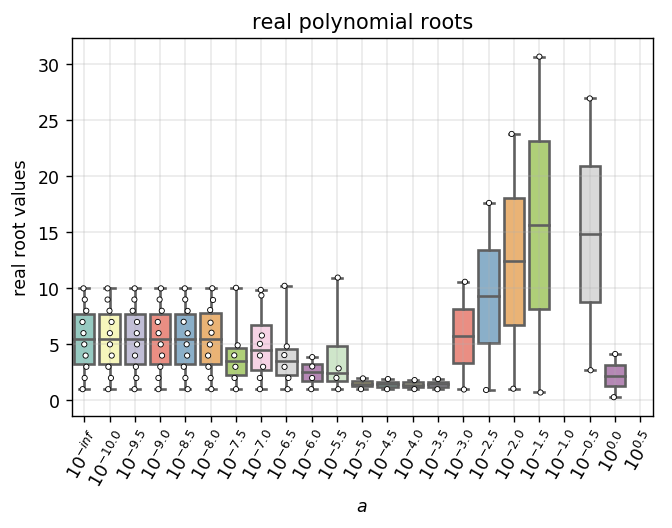

In [10]:
sns.stripplot(x='a_exp', y='values', data=a_roots_df_melt, size=3, color='white', linewidth=0.5, edgecolor='black')

#boxplot = sns.boxplot(x='a_rounded', y='values', data=a_roots_df_melt, whis=np.inf, palette='Set3')
boxplot = sns.boxplot(x='a_exp', y='values', data=a_roots_df_melt, whis=np.inf, palette='Set3')


display_xlabels = [{float(str(label.get_text()))} for label in boxplot.get_xticklabels()]
boxplot.set_xticklabels(['$10^{}$'.format(label) for label in display_xlabels], rotation=60, horizontalalignment='center')

#boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=60, horizontalalignment='center')
boxplot.set(xlabel='$a$')
boxplot.set(ylabel='real root values')
boxplot.set(title='real polynomial roots')

plt.grid(linestyle='-', linewidth=0.25)
plt.show()

$a$ versus all root values

In [11]:
a_roots = []
for a in a_vals:
    trial_coeff = perturb_coeff(a, coeff_ck)
    trial_roots = roots_perturb_coeff(trial_coeff) # all roots
    a_roots.append(trial_roots)

a_roots_df = pd.DataFrame(a_roots)
a_roots_df.insert(0, 'a', a_vals)
#a_roots_df.insert(0, 'a_exp', [float('-inf')] + a_exp)
a_roots_df.insert(0, 'a_exp', [-math.inf] + a_exp)
a_roots_df.insert(0, 'a_rounded', a_roots_df['a'].round(2))
print(a_roots_df.shape)

(23, 13)


In [12]:
a_roots_df_melt = pd.melt(a_roots_df, id_vars=['a', 'a_exp', 'a_rounded'], var_name='roots', value_name='values')
a_roots_df_melt = a_roots_df_melt.sort_values(by=['a'])
a_roots_df_melt['real'] = a_roots_df_melt['values'].real
a_roots_df_melt['imaginary'] = a_roots_df_melt['values'].imag

print(a_roots_df_melt.shape)
a_roots_df_melt.head(200)

(230, 7)


,a,a_exp,a_rounded,roots,values,real,imaginary
0,0.000000e+00,-inf,0.00,0,(10.000000000340687+0j),10.000000,0.000000
23,0.000000e+00,-inf,0.00,1,(8.99999999849376+0j),9.000000,0.000000
115,0.000000e+00,-inf,0.00,5,(4.999999999494381+0j),5.000000,0.000000
46,0.000000e+00,-inf,0.00,2,(8.000000002751277+0j),8.000000,0.000000
92,0.000000e+00,-inf,0.00,4,(6.000000001506791+0j),6.000000,0.000000
69,0.000000e+00,-inf,0.00,3,(6.999999997320477+0j),7.000000,0.000000
184,0.000000e+00,-inf,0.00,8,(2.00000000000165+0j),2.000000,0.000000
161,0.000000e+00,-inf,0.00,7,(2.999999999983562+0j),3.000000,0.000000
138,0.000000e+00,-inf,0.00,6,(4.000000000107472+0j),4.000000,0.000000
207,0.000000e+00,-inf,0.00,9,(0.99999999999995+0j),1.000000,0.000000


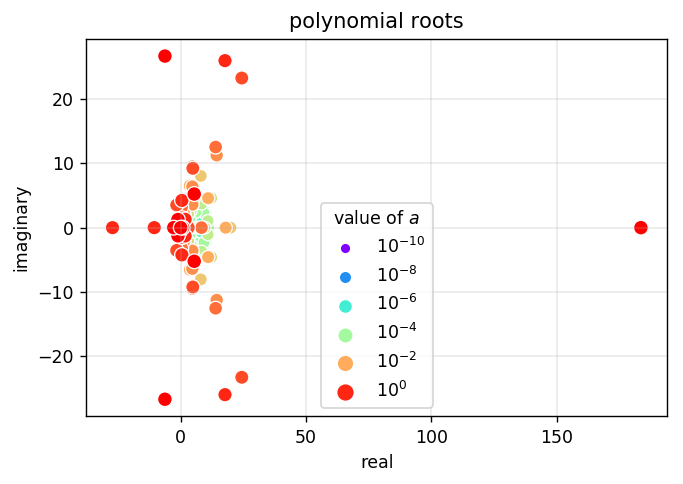

In [13]:
#a_roots_df_melt_nan = a_roots_df_melt.replace(-math.inf, -10.5) # np.nan, for legend to work
a_roots_df_melt_nan = a_roots_df_melt.replace(-math.inf, np.nan)

cmap = 'rainbow'
#cmap = sns.color_palette('pastel', n_colors=22)
roots_plot = sns.scatterplot(x='real', y='imaginary', data=a_roots_df_melt_nan, 
                             hue='a_exp', size='a_exp', legend='full', palette=cmap)

handles, labels = roots_plot.get_legend_handles_labels()
display_labels = [{int(float(label))} for label in labels[1::4]]
roots_plot.legend(handles[1::4], ['$10^{}$'.format(label) for label in display_labels], title='value of $a$')
roots_plot.set_title('polynomial roots')

plt.grid(linestyle='-', linewidth=0.25)
plt.show()

### Statistical analyses 